# example: Keras dimensional reduction inception convolutional neural network on MNIST

- <https://arxiv.org/pdf/1409.4842.pdf>
- <http://marubon-ds.blogspot.com/2018/06/how-to-write-inception-module.html>

The concept of the inception module focuses on the kernel size. The inception module uses three types of kernel at once.

In [1]:
import numpy as np
np.random.seed(1337)
import datetime
from IPython.display import SVG
import keras
from keras import activations
from keras import backend as K
from keras.layers import Dense, Input, concatenate, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Model
from keras.datasets import mnist
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks')
sns.set_palette('husl')
import talos as ta
from vis.visualization import visualize_activation
from vis.visualization import visualize_saliency
from vis.utils import utils

Using TensorFlow backend.


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [17, 17]

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))#[:2000]
y_train = to_categorical(y_train, 10)#[:2000]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 6)    12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 6)    12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (

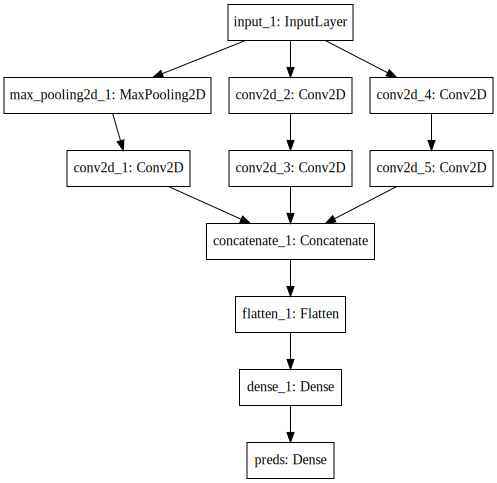

In [4]:
inputs  = Input(x_train.shape[1:])
tower_1 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
tower_1 = Conv2D(6, (1, 1), activation='tanh', border_mode='same')(tower_1)
tower_2 = Conv2D(6, (1, 1), activation='tanh', border_mode='same')(inputs)
tower_2 = Conv2D(6, (3, 3), activation='tanh', border_mode='same')(tower_2)
tower_3 = Conv2D(6, (1, 1), activation='tanh', border_mode='same')(inputs)
tower_3 = Conv2D(6, (5, 5), activation='tanh', border_mode='same')(tower_3)
x       = concatenate([tower_1, tower_2, tower_3], axis=3)
x       = Flatten()(x)
x       = Dense(10, activation='tanh')(x)
preds   = Dense(10, activation='softmax', name='preds')(x)
model   = Model(input=inputs, output=preds)
model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = 'nadam',
    metrics   = ['accuracy']
)
#plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
%%time
model.fit(x_train, y_train, epochs=30, shuffle=True, validation_split=0.1, verbose=False)

CPU times: user 4min 15s, sys: 22.2 s, total: 4min 37s
Wall time: 3min 2s


max. test accuracy observed: 0.947
max. test accuracy history index: 18


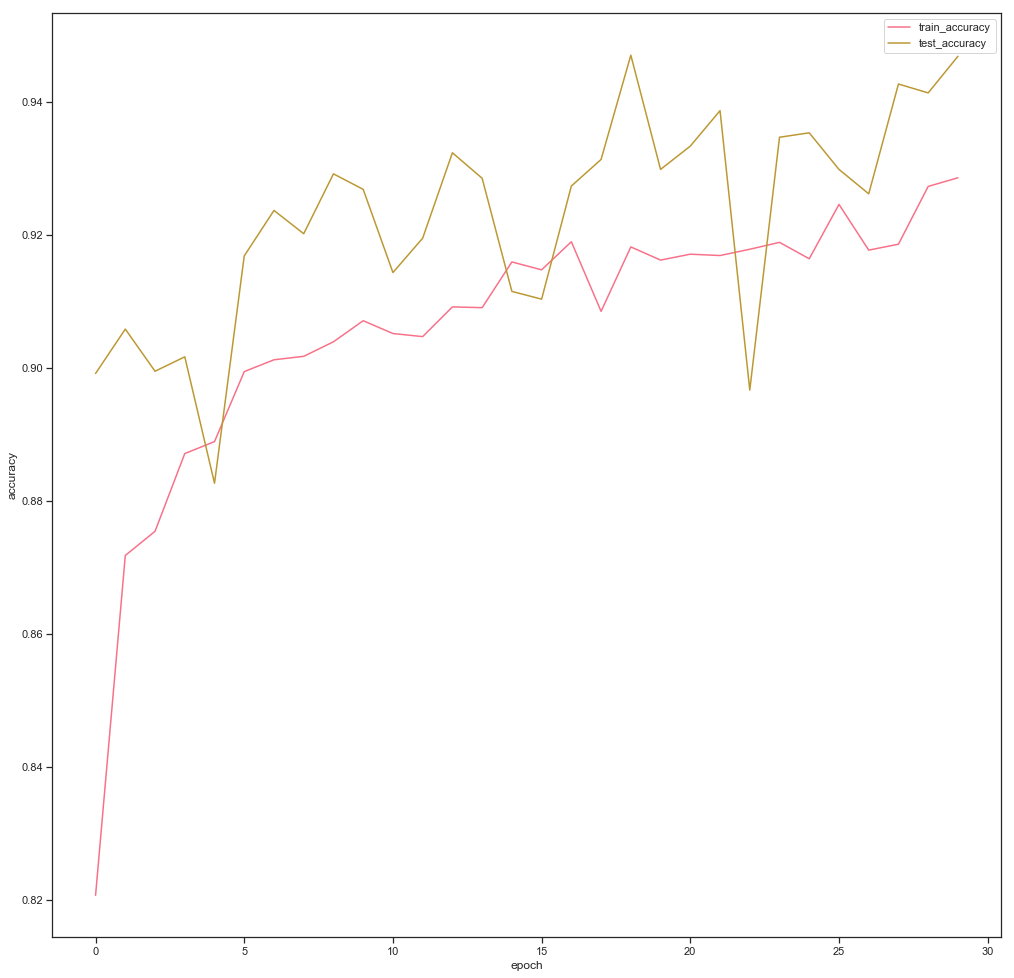

In [6]:
#print(datetime.datetime.utcnow().strftime("%Y-%m-%dT%H%M%SZ"))
print('max. test accuracy observed:', max(model.history.history['val_acc']))
print('max. test accuracy history index:', model.history.history['val_acc'].index(max(model.history.history['val_acc'])))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
plt.show()